In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def pull_top_hits(ligand, dataset):
    if ligand == "D":
        ginf = "log_ginf_1-DIQ"
        ginf_var = "log_ginf_1-DIQ_err"
        ec50 = "log_ec50_1-DIQ"
        ec50_var = "log_ec50_1-DIQ_err"
        spec = "GP_spec_1-DIQ"
        spec_var = "GP_spec_1-DIQ_err"
    elif ligand == "S":
        ginf = "log_ginf_1S-TIQ"
        ginf_var = "log_ginf_1S-TIQ_err"
        ec50 = "log_ec50_1S-TIQ"
        ec50_var = "log_ec50_1S-TIQ_err"
        spec = "GP_spec_1S-TIQ"
        spec_var = "GP_spec_1S-TIQ_err"
    elif ligand == "R":
        ginf = "log_ginf_1R-TIQ"
        ginf_var = "log_ginf_1R-TIQ_err"
        ec50 = "log_ec50_1R-TIQ"
        ec50_var = "log_ec50_1R-TIQ_err"
        spec = "GP_spec_1R-TIQ"
        spec_var = "GP_spec_1R-TIQ_err"

    err_cut = 0.55
    fold_ind = 1.7          #50
    selectivity_cut = 1.5   #30
    ec50_cut = 2.3          #200

    with open(dataset) as f:

        data = pd.read_csv(f)

        c = 0
        for i, row in data.iterrows():

            if row["log_g0_err"] < err_cut and row[ginf_var] < err_cut and row[spec_var] < err_cut and row[ec50_var] < err_cut:
                if row[ginf] / row["log_g0"] > fold_ind:
                    if row[ec50] < ec50_cut:
                        if row[spec] > selectivity_cut:
                            c += 1
    return c


In [130]:
sns.set()
sns.set_style("white")
# sns.set(font="Verdana")
sns.set_style("ticks", {'xtick.direction':'in', 'xtick.top':False, 'ytick.direction':'in', 'ytick.right':False, })
plt.rcParams["xtick.labelsize"] = 28



def plot_metrics(d, r, s, plt_name):
    # labels
    x = np.array(["DHIQ", "R-THIQ", "S-THIQ"])
    y = np.array([d, r, s])
    fig = plt.figure(figsize=(6,7))
    ax = fig.add_subplot()
    ax.set_xscale("log")
    ax.set_xlim(0, 10000)

    plt.barh(x,y, height=0.6)
    plt.gca().invert_yaxis()
    plt.savefig(plt_name, format="svg")
    plt.show()

/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_34055/3931801687.py:16: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 10000)


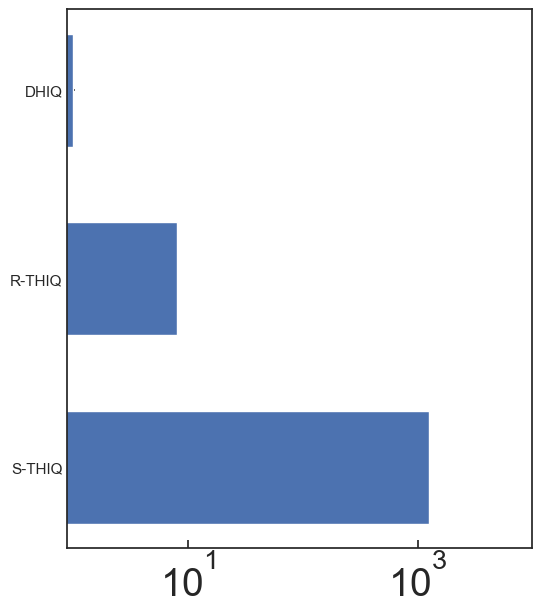

In [131]:
ep_d = pull_top_hits("D", "datasets/epLib.csv")
ep_r = pull_top_hits("R", "datasets/epLib.csv")
ep_s = pull_top_hits("S", "datasets/epLib.csv")

plot_metrics(ep_d, ep_r, ep_s, 'epLib_topVariants.svg')

/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_34055/3931801687.py:16: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 10000)


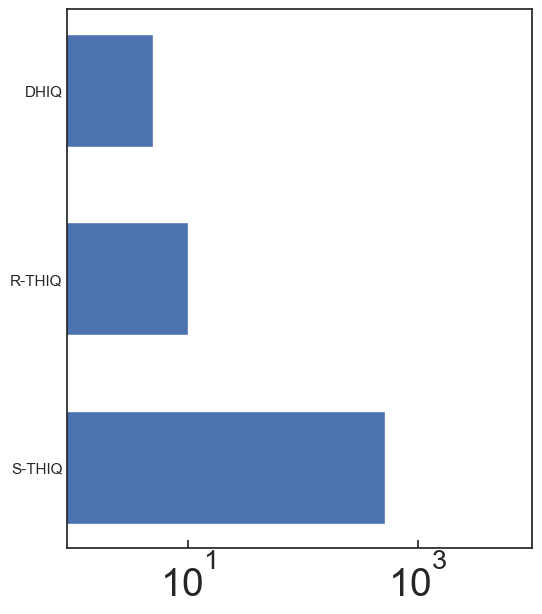

In [132]:
ss_d = pull_top_hits("D", "datasets/ssLibs.csv")
ss_r = pull_top_hits("R", "datasets/ssLibs.csv")
ss_s = pull_top_hits("S", "datasets/ssLibs.csv")

plot_metrics(ss_d, ss_r, ss_s, 'ssLib_topVariants.svg')

/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_34055/3931801687.py:16: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 10000)


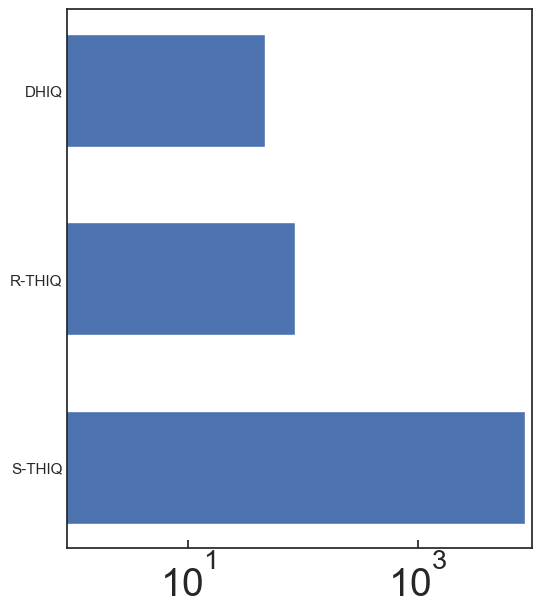

In [133]:
sh_d = pull_top_hits("D", "datasets/shuffleLib.csv")
sh_r = pull_top_hits("R", "datasets/shuffleLib.csv")
sh_s = pull_top_hits("S", "datasets/shuffleLib.csv")

plot_metrics(sh_d, sh_r, sh_s, 'shuffleLib_topVariants.svg')